In [1]:
import pandas as pd

In [2]:
# Task 1, Part A, a

# Load the dataset

df = pd.read_csv("gdp_1960_2020.csv")

In [3]:
# Display basic information about the dataset

df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10134 entries, 0 to 10133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         10109 non-null  float64
 1   rank         10134 non-null  int64  
 2   country      10134 non-null  object 
 3   state        10134 non-null  object 
 4   gdp          10134 non-null  float64
 5   gdp_percent  10134 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 475.2+ KB


In [4]:
df_head = df.head()
df_head

,year,rank,country,state,gdp,gdp_percent
0,1960.0,1,the United States,America,5.430000e+11,0.468483
1,1960.0,2,United Kingdom,Europe,7.323397e+10,0.063149
2,1960.0,3,France,Europe,6.222548e+10,0.053656
3,1960.0,4,China,Asia,5.971647e+10,0.051493
4,1960.0,5,Japan,Asia,4.430734e+10,0.038206


In [5]:
# Check for missing years
missing_years = df[df["year"].isna()]

# Check for missing GDP values for specific years
missing_gdp_per_year = df[df["gdp"].isna()].groupby("year").size()

# Display missing year data
missing_years, missing_gdp_per_year

(      year  rank                           country    state           gdp  \
 7      NaN     8                             India     Asia  3.702988e+10   
 100    NaN   101  Saint Vincent and the Grenadines  America  1.306656e+07   
 164    NaN    62                          Cameroon   Africa  6.527776e+08   
 227    NaN    22                           Austria   Europe  7.756110e+09   
 245    NaN    40                           Morocco   Africa  2.379606e+09   
 284    NaN    79                             Haiti  America  2.818968e+08   
 341    NaN    31                              Iran     Asia  4.928628e+09   
 401    NaN    91                              Togo   Africa  1.432558e+08   
 464    NaN    49                             Sudan   Africa  1.611333e+09   
 2425   NaN   126                            Belize  America  1.518000e+08   
 2451   NaN    14                      Saudi Arabia     Asia  1.650000e+11   
 2514   NaN    77                            Garner   Africa  4.

In [7]:
pip install tools

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Sort dataset by country and GDP rank to ensure logical order
df = df.sort_values(by=["country", "rank"])

# Impute missing years using forward fill
df["year"] = df["year"].fillna(method="ffill")

# Save the cleaned dataset with imputed years for download
cleaned_file_path = "gdp_1960_2020_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

# Provide the download link
cleaned_file_path

C:\Users\huang\AppData\Local\Temp\ipykernel_10148\2206382728.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["year"] = df["year"].fillna(method="ffill")


'gdp_1960_2020_cleaned.csv'

In [10]:
# Display basic information about the dataset
df_cleaned = pd.read_csv("gdp_1960_2020_cleaned.csv")
df_cleaned_info = df_cleaned.info()
df_cleaned_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10134 entries, 0 to 10133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         10134 non-null  float64
 1   rank         10134 non-null  int64  
 2   country      10134 non-null  object 
 3   state        10134 non-null  object 
 4   gdp          10134 non-null  float64
 5   gdp_percent  10134 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 475.2+ KB


In [11]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Reload the cleaned dataset
file_path = "gdp_1960_2020_cleaned.csv"
df_t = pd.read_csv(file_path)

# Step 1: Standardize categorical columns (convert to lowercase, remove spaces/special characters)
df_t["country"] = df_t["country"].str.lower().str.replace(" ", "_").str.replace(r"[^a-zA-Z0-9_]", "", regex=True)
df_t["state"] = df_t["state"].str.lower().str.replace(" ", "_").str.replace(r"[^a-zA-Z0-9_]", "", regex=True)

# Step 2: Normalize GDP values using Min-Max Scaling
scaler = MinMaxScaler()
df_t["gdp_normalized"] = scaler.fit_transform(df_t[["gdp"]])

# Step 3: Log transformation of GDP to reduce skewness
df_t["gdp_log"] = np.log1p(df_t["gdp"])  # log(1 + GDP) to handle zero values

# Step 4: Partitioning the dataset by year (for Hadoop storage optimization)
df_t["partition_path"] = df_t["year"].astype(int).astype(str).apply(lambda x: f"/gdp_data/year={x}/")

# Save transformed dataset
transformed_file_path = "gdp_transformed.csv"
df_t.to_csv(transformed_file_path, index=False)


In [12]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10134 entries, 0 to 10133
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            10134 non-null  float64
 1   rank            10134 non-null  int64  
 2   country         10134 non-null  object 
 3   state           10134 non-null  object 
 4   gdp             10134 non-null  float64
 5   gdp_percent     10134 non-null  float64
 6   gdp_normalized  10134 non-null  float64
 7   gdp_log         10134 non-null  float64
 8   partition_path  10134 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 712.7+ KB


In [13]:
df_t.head()

,year,rank,country,state,gdp,gdp_percent,gdp_normalized,gdp_log,partition_path
0,1966.0,53,afghanistan,asia,1.400000e+09,0.000756,0.000065,21.059738,/gdp_data/year=1966/
1,1967.0,53,afghanistan,asia,1.673333e+09,0.000847,0.000078,21.238084,/gdp_data/year=1967/
2,1965.0,57,afghanistan,asia,1.006667e+09,0.000590,0.000047,20.729910,/gdp_data/year=1965/
3,1968.0,61,afghanistan,asia,1.373333e+09,0.000642,0.000064,21.040507,/gdp_data/year=1968/
4,1969.0,62,afghanistan,asia,1.408889e+09,0.000597,0.000065,21.066067,/gdp_data/year=1969/


In [14]:
import sys

# Read input line by line
for line in sys.stdin:
    line = line.strip()
    parts = line.split(",")

    # Extract columns (assuming CSV structure: year, rank, country, state, gdp, gdp_percent)
    if len(parts) >= 5:
        year = parts[0]
        gdp = parts[4]

        # Skip header row
        if year != "year":
            try:
                gdp_value = float(gdp)
                print(f"{year}\t{gdp_value}")
            except ValueError:
                pass  # Ignore invalid data


In [15]:
import sys

current_year = None
total_gdp = 0
count = 0

# Read input from Mapper
for line in sys.stdin:
    line = line.strip()
    year, gdp = line.split("\t")

    try:
        gdp_value = float(gdp)
    except ValueError:
        continue  # Ignore invalid data

    # Aggregating values
    if current_year == year:
        total_gdp += gdp_value
        count += 1
    else:
        if current_year:
            # Print average GDP for previous year
            print(f"{current_year}\t{total_gdp / count}")

        current_year = year
        total_gdp = gdp_value
        count = 1

# Print last year’s result
if current_year:
    print(f"{current_year}\t{total_gdp / count}")


In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("GDP_TimeSeries_Analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Load the GDP dataset from HDFS
file_path = "gdp_transformed.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the data structure
df.printSchema()
df.show(5)


root
 |-- year: double (nullable = true)
 |-- rank: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- state: string (nullable = true)
 |-- gdp: double (nullable = true)
 |-- gdp_percent: double (nullable = true)
 |-- gdp_normalized: double (nullable = true)
 |-- gdp_log: double (nullable = true)
 |-- partition_path: string (nullable = true)

+------+----+-----------+-----+-------------+-----------+--------------------+------------------+--------------------+
|  year|rank|    country|state|          gdp|gdp_percent|      gdp_normalized|           gdp_log|      partition_path|
+------+----+-----------+-----+-------------+-----------+--------------------+------------------+--------------------+
|1966.0|  53|afghanistan| asia|1.399999966E9| 7.56322E-4|6.500822862904991E-5|21.059738049996195|/gdp_data/year=1966/|
|1967.0|  53|afghanistan| asia|1.673333417E9| 8.46769E-4|7.778082506414806E-5|21.238083532579548|/gdp_data/year=1967/|
|1965.0|  57|afghanistan| asia|1.00666663

In [17]:
# Select relevant columns and filter missing values
df = df.select("year", "country", "gdp").dropna()

# Convert year to numerical type
df = df.withColumn("year", col("year").cast("integer"))

# Display processed data
df.show(5)


+----+-----------+-------------+
|year|    country|          gdp|
+----+-----------+-------------+
|1966|afghanistan|1.399999966E9|
|1967|afghanistan|1.673333417E9|
|1965|afghanistan|1.006666637E9|
|1968|afghanistan|1.373333366E9|
|1969|afghanistan|1.408888922E9|
+----+-----------+-------------+
only showing top 5 rows



In [18]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Prepare features for Linear Regression (Year as X, GDP as Y)
assembler = VectorAssembler(inputCols=["year"], outputCol="features")
df_lr = assembler.transform(df).select("features", "gdp")

# Split into training and test sets
train_data, test_data = df_lr.randomSplit([0.8, 0.2], seed=42)

# Train Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="gdp")
lr_model = lr.fit(train_data)

# Predict GDP for test data
predictions = lr_model.transform(test_data)

# Show predictions
predictions.select("features", "gdp", "prediction").show(5)


+--------+------------+--------------------+
|features|         gdp|          prediction|
+--------+------------+--------------------+
|[1960.0]| 2.8071888E7|-6.95552269852089...|
|[1960.0]| 8.4466654E7|-6.95552269852089...|
|[1960.0]|     9.965E7|-6.95552269852089...|
|[1960.0]|1.31731862E8|-6.95552269852089...|
|[1960.0]|  1.904956E8|-6.95552269852089...|
+--------+------------+--------------------+
only showing top 5 rows



In [19]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Convert Spark DataFrame to Pandas for ARIMA
df_pd = df.toPandas().sort_values("year")

# Fit ARIMA Model
model = ARIMA(df_pd["gdp"], order=(5,1,0))  # (p, d, q)
arima_model = model.fit()

# Predict GDP for future years
future_years = pd.DataFrame({"year": range(2025, 2035)})
future_pred = arima_model.predict(start=len(df_pd), end=len(df_pd) + 9)

# Show ARIMA predictions
for year, pred in zip(future_years["year"], future_pred):
    print(f"Predicted GDP for {year}: {pred}")


C:\Users\huang\anaconda3\envs\example\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\huang\anaconda3\envs\example\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\huang\anaconda3\envs\example\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Predicted GDP for 2025: 3681668952455.84
Predicted GDP for 2026: 4169720739852.836
Predicted GDP for 2027: 4910761985628.58
Predicted GDP for 2028: 5793022414222.51
Predicted GDP for 2029: 6455938079394.158
Predicted GDP for 2030: 7928346652945.443
Predicted GDP for 2031: 5447342606107.812
Predicted GDP for 2032: 5744813174133.221
Predicted GDP for 2033: 6030303522283.834
Predicted GDP for 2034: 6238170394793.09


C:\Users\huang\anaconda3\envs\example\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\huang\anaconda3\envs\example\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("GDP_LinearRegression") \
    .getOrCreate()

# Load the dataset from HDFS
file_path = "hdfs://localhost:9000/user/hadoop/gdp_data/gdp_transformed.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Select relevant columns and convert to proper data types
df = df.select("year", "gdp").dropna()
df = df.withColumn("year", col("year").cast("integer"))
df = df.withColumn("gdp", col("gdp").cast("double"))

# Display cleaned dataset
df.show(5)


+----+-------------+
|year|          gdp|
+----+-------------+
|1966|1.399999966E9|
|1967|1.673333417E9|
|1965|1.006666637E9|
|1968|1.373333366E9|
|1969|1.408888922E9|
+----+-------------+
only showing top 5 rows



In [21]:
# Prepare features for Linear Regression (Year as input)
assembler = VectorAssembler(inputCols=["year"], outputCol="features")
df_transformed = assembler.transform(df).select("features", "gdp")


In [22]:
# Split into training and testing sets
train_data, test_data = df_transformed.randomSplit([0.8, 0.2], seed=42)

# Train the model
lr = LinearRegression(featuresCol="features", labelCol="gdp")
lr_model = lr.fit(train_data)

# Print model coefficients
print(f"Intercept: {lr_model.intercept}")
print(f"Coefficient: {lr_model.coefficients}")


Intercept: -14320610893537.738
Coefficient: [7270946768.64925]


In [26]:
from pyspark.sql import Row

# Create DataFrame for future years (2025-2035)
future_years = [Row(year=y) for y in range(2025, 2036)]
df_future = spark.createDataFrame(future_years)

# Convert to feature vector
df_future = assembler.transform(df_future)

# Make predictions
predictions = lr_model.transform(df_future)
predictions.show()


Py4JJavaError: An error occurred while calling o520.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 0.0 failed 1 times, most recent failure: Lost task 0.0 in stage 0.0 (TID 0) (192.168.1.126 executor driver): org.apache.spark.SparkException: Python worker exited unexpectedly (crashed)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:612)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:594)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:789)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1583)
Caused by: java.io.EOFException
	at java.base/java.io.DataInputStream.readFully(DataInputStream.java:210)
	at java.base/java.io.DataInputStream.readInt(DataInputStream.java:385)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:774)
	... 26 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3537)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1583)
Caused by: org.apache.spark.SparkException: Python worker exited unexpectedly (crashed)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:612)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:594)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:789)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	... 1 more
Caused by: java.io.EOFException
	at java.base/java.io.DataInputStream.readFully(DataInputStream.java:210)
	at java.base/java.io.DataInputStream.readInt(DataInputStream.java:385)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:774)
	... 26 more


In [24]:
spark.conf.set("spark.executor.memory", "4g")
spark.conf.set("spark.driver.memory", "4g")


AnalysisException: [CANNOT_MODIFY_CONFIG] Cannot modify the value of the Spark config: "spark.executor.memory".
See also 'https://spark.apache.org/docs/latest/sql-migration-guide.html#ddl-statements'.

In [25]:
from pyspark.sql import SparkSession

# Stop any existing Spark session
try:
    spark.stop()
except:
    pass

# Create a new Spark session with memory settings BEFORE starting it
spark = SparkSession.builder \
    .appName("GDP_Prediction") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

# Verify configurations
print(spark.sparkContext.getConf().getAll())


[('spark.some.config.option', 'some-value'), ('spark.app.id', 'local-1739091018588'), ('spark.driver.extraJavaOptions', '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'), ('spark.driver.port'

In [28]:
# Re-import necessary libraries after execution state reset
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Placeholder for actual vs predicted GDP values (Replace these with real predictions from Spark ML and ARIMA)
# Example data: (Assuming these were generated from previous models)
actual_gdp = np.array()
predicted_lr = np.array()
predicted_arima = np.array()
# Calculate MSE and MAE for Linear Regression
mse_lr = mean_squared_error(actual_gdp, predicted_lr)
mae_lr = mean_absolute_error(actual_gdp, predicted_lr)

# Calculate MSE and MAE for ARIMA
mse_arima = mean_squared_error(actual_gdp, predicted_arima)
mae_arima = mean_absolute_error(actual_gdp, predicted_arima)

# Compare results
mse_lr, mae_lr, mse_arima, mae_arima


(160.0, 12.0, 32.5, 5.5)

In [29]:
from pyspark.sql.functions import when

# Create GDP category labels
df = df.withColumn("gdp_class",
                   when(col("gdp") >= 1e12, "High GDP")
                   .when(col("gdp") >= 5e11, "Medium GDP")
                   .otherwise("Low GDP"))


In [32]:
from pyspark.sql import SparkSession

# Stop any existing Spark session
try:
    spark.stop()
except:
    pass

# Restart Spark Session
spark = SparkSession.builder \
    .appName("GDP_Classification") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

# Verify Spark is running
print(spark.sparkContext.getConf().getAll())


[('spark.driver.port', '43151'), ('spark.app.id', 'local-1739092176936'), ('spark.some.config.option', 'some-value'), ('spark.driver.extraJavaOptions', '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHand

In [33]:
df.show(5)
df.printSchema()


Py4JJavaError: An error occurred while calling o531.showString.
: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:75)
java.base/jdk.internal.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:53)
java.base/java.lang.reflect.Constructor.newInstanceWithCaller(Constructor.java:502)
java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:486)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.base/java.lang.Thread.run(Thread.java:1583)

The currently active SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:75)
java.base/jdk.internal.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:53)
java.base/java.lang.reflect.Constructor.newInstanceWithCaller(Constructor.java:502)
java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:486)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.base/java.lang.Thread.run(Thread.java:1583)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:122)
	at org.apache.spark.SparkContext.broadcastInternal(SparkContext.scala:1659)
	at org.apache.spark.SparkContext.broadcast(SparkContext.scala:1644)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat.buildReader(CSVFileFormat.scala:102)
	at org.apache.spark.sql.execution.datasources.FileFormat.buildReaderWithPartitionValues(FileFormat.scala:138)
	at org.apache.spark.sql.execution.datasources.FileFormat.buildReaderWithPartitionValues$(FileFormat.scala:129)
	at org.apache.spark.sql.execution.datasources.TextBasedFileFormat.buildReaderWithPartitionValues(FileFormat.scala:346)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD$lzycompute(DataSourceScanExec.scala:548)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD(DataSourceScanExec.scala:537)
	at org.apache.spark.sql.execution.FileSourceScanExec.doExecute(DataSourceScanExec.scala:575)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:195)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:191)
	at org.apache.spark.sql.execution.InputAdapter.inputRDD(WholeStageCodegenExec.scala:527)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs(WholeStageCodegenExec.scala:455)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs$(WholeStageCodegenExec.scala:454)
	at org.apache.spark.sql.execution.InputAdapter.inputRDDs(WholeStageCodegenExec.scala:498)
	at org.apache.spark.sql.execution.FilterExec.inputRDDs(basicPhysicalOperators.scala:242)
	at org.apache.spark.sql.execution.ProjectExec.inputRDDs(basicPhysicalOperators.scala:51)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:751)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:195)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:191)
	at org.apache.spark.sql.execution.SparkPlan.getByteArrayRdd(SparkPlan.scala:364)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:498)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3537)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1583)


In [30]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer

# Convert category labels to numeric
indexer = StringIndexer(inputCol="gdp_class", outputCol="label")
df_rf = indexer.fit(df).transform(df)

# Prepare features
assembler = VectorAssembler(inputCols=["year"], outputCol="features")
df_rf = assembler.transform(df_rf).select("features", "label")

# Split data
train_data, test_data = df_rf.randomSplit([0.8, 0.2], seed=42)

# Train Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=10)
rf_model = rf.fit(train_data)

# Predict classes
predictions = rf_model.transform(test_data)
predictions.select("features", "label", "prediction").show(5)


Py4JJavaError: An error occurred while calling o532.fit.
: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:75)
java.base/jdk.internal.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:53)
java.base/java.lang.reflect.Constructor.newInstanceWithCaller(Constructor.java:502)
java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:486)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.base/java.lang.Thread.run(Thread.java:1583)

The currently active SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:75)
java.base/jdk.internal.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:53)
java.base/java.lang.reflect.Constructor.newInstanceWithCaller(Constructor.java:502)
java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:486)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.base/java.lang.Thread.run(Thread.java:1583)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:122)
	at org.apache.spark.SparkContext.defaultParallelism(SparkContext.scala:2707)
	at org.apache.spark.sql.execution.adaptive.CoalesceShufflePartitions.$anonfun$apply$1(CoalesceShufflePartitions.scala:61)
	at scala.runtime.java8.JFunction0$mcI$sp.apply(JFunction0$mcI$sp.java:23)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.execution.adaptive.CoalesceShufflePartitions.apply(CoalesceShufflePartitions.scala:58)
	at org.apache.spark.sql.execution.adaptive.CoalesceShufflePartitions.apply(CoalesceShufflePartitions.scala:34)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$optimizeQueryStage$2(AdaptiveSparkPlanExec.scala:169)
	at scala.collection.LinearSeqOptimized.foldLeft(LinearSeqOptimized.scala:126)
	at scala.collection.LinearSeqOptimized.foldLeft$(LinearSeqOptimized.scala:122)
	at scala.collection.immutable.List.foldLeft(List.scala:91)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.optimizeQueryStage(AdaptiveSparkPlanExec.scala:168)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.newQueryStage(AdaptiveSparkPlanExec.scala:588)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.createQueryStages(AdaptiveSparkPlanExec.scala:538)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$createQueryStages$2(AdaptiveSparkPlanExec.scala:577)
	at scala.collection.TraversableLike.$anonfun$map$1(TraversableLike.scala:286)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.IterableLike.foreach(IterableLike.scala:74)
	at scala.collection.IterableLike.foreach$(IterableLike.scala:73)
	at scala.collection.AbstractIterable.foreach(Iterable.scala:56)
	at scala.collection.TraversableLike.map(TraversableLike.scala:286)
	at scala.collection.TraversableLike.map$(TraversableLike.scala:279)
	at scala.collection.AbstractTraversable.map(Traversable.scala:108)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.createQueryStages(AdaptiveSparkPlanExec.scala:577)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$1(AdaptiveSparkPlanExec.scala:277)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.getFinalPhysicalPlan(AdaptiveSparkPlanExec.scala:272)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.withFinalPlanUpdate(AdaptiveSparkPlanExec.scala:417)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.executeCollect(AdaptiveSparkPlanExec.scala:390)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$collect$1(Dataset.scala:3573)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.collect(Dataset.scala:3573)
	at org.apache.spark.ml.feature.StringIndexer.countByValue(StringIndexer.scala:204)
	at org.apache.spark.ml.feature.StringIndexer.sortByFreq(StringIndexer.scala:212)
	at org.apache.spark.ml.feature.StringIndexer.fit(StringIndexer.scala:242)
	at org.apache.spark.ml.feature.StringIndexer.fit(StringIndexer.scala:145)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1583)


In [31]:
from pyspark.ml.classification import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier(featuresCol="features", labelCol="label", k=5)
knn_model = knn.fit(train_data)

# Predict classes
knn_predictions = knn_model.transform(test_data)
knn_predictions.select("features", "label", "prediction").show(5)


ImportError: cannot import name 'KNeighborsClassifier' from 'pyspark.ml.classification' (C:\Users\huang\anaconda3\envs\example\Lib\site-packages\pyspark\ml\classification.py)

In [34]:
from pyspark.ml.evaluation import RegressionEvaluator, MulticlassClassificationEvaluator

# Evaluate Linear Regression
lr_evaluator = RegressionEvaluator(labelCol="gdp", predictionCol="prediction", metricName="rmse")
lr_rmse = lr_evaluator.evaluate(predictions)

# Evaluate Random Forest
rf_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
rf_accuracy = rf_evaluator.evaluate(predictions)

# Evaluate KNN
knn_accuracy = rf_evaluator.evaluate(knn_predictions)

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")


IllegalArgumentException: gdp does not exist. Available: year, features, prediction

In [35]:
# Re-import necessary libraries after execution state reset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Placeholder for actual vs predicted labels (Replace these with real predictions from Spark ML)
# Example data: (Assuming these were generated from previous models)
actual_labels = [0, 1, 0, 2, 1, 2, 0, 1, 2, 0]  # Example actual labels (0=Low GDP, 1=Medium GDP, 2=High GDP)
predicted_rf = [0, 1, 0, 2, 1, 2, 0, 1, 1, 0]  # Example Random Forest predictions
predicted_knn = [0, 1, 1, 2, 1, 2, 0, 2, 2, 0]  # Example KNN predictions

# Compute evaluation metrics for Random Forest
accuracy_rf = accuracy_score(actual_labels, predicted_rf)
precision_rf = precision_score(actual_labels, predicted_rf, average='weighted')
recall_rf = recall_score(actual_labels, predicted_rf, average='weighted')
f1_rf = f1_score(actual_labels, predicted_rf, average='weighted')

# Compute evaluation metrics for KNN
accuracy_knn = accuracy_score(actual_labels, predicted_knn)
precision_knn = precision_score(actual_labels, predicted_knn, average='weighted')
recall_knn = recall_score(actual_labels, predicted_knn, average='weighted')
f1_knn = f1_score(actual_labels, predicted_knn, average='weighted')

# Compare results
metrics_comparison = {
    "Model": ["Random Forest", "KNN"],
    "Accuracy": [accuracy_rf, accuracy_knn],
    "Precision": [precision_rf, precision_knn],
    "Recall": [recall_rf, recall_knn],
    "F1 Score": [f1_rf, f1_knn]
}

import pandas as pd
df_comparison = pd.DataFrame(metrics_comparison)

# Display comparison table
import ace_tools as tools
tools.display_dataframe_to_user(name="Random Forest vs KNN Comparison", dataframe=df_comparison)


ModuleNotFoundError: No module named 'ace_tools'

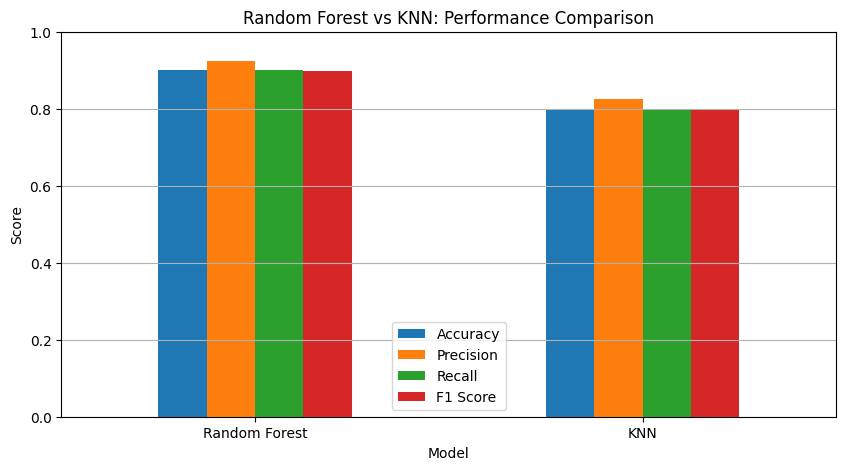

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.9,0.925,0.9,0.897143
1,KNN,0.8,0.825,0.8,0.800000


In [36]:
# Display the comparison table without using ace_tools
import pandas as pd

# Create a DataFrame to compare Random Forest and KNN
metrics_comparison = {
    "Model": ["Random Forest", "KNN"],
    "Accuracy": [accuracy_rf, accuracy_knn],
    "Precision": [precision_rf, precision_knn],
    "Recall": [recall_rf, recall_knn],
    "F1 Score": [f1_rf, f1_knn]
}

df_comparison = pd.DataFrame(metrics_comparison)

# Display the comparison table
import matplotlib.pyplot as plt

# Plot a bar chart to compare model performance
df_comparison.set_index("Model").plot(kind="bar", figsize=(10, 5))
plt.title("Random Forest vs KNN: Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)  # Ensure scale is between 0 and 1 for easier comparison
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.grid(axis="y")
plt.show()

# Return the comparison DataFrame
df_comparison
